<a href="https://colab.research.google.com/github/RandivCosta/data-analysis/blob/main/skewness_assesment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [ ]:
df = pd.read_csv('adjusted_data.csv')
# print(df.head())
# print("\nData types:\n", df.dtypes)

###Calculation of skewness using scipy

In [ ]:
# bacterial names
bacterial_types = df.columns[3:6].tolist()

# group by Site and Area
# skewness for each bacterial type
skewness_results = df.groupby(['Site', 'Area'])[bacterial_types].agg(skew)
print("\nSkewness results:\n", skewness_results)
print("\nOverall Skewness Statistics:")
print(skewness_results.describe())


Skewness results:
                   BC-Enterococcus (CFU/100ml)  BC-Fecal Coliform(CFU/100ml)  \
Site   Area                                                                   
Site 1 Sand                         -0.533350                     -0.356983   
       Sea Water                    -0.038531                      0.042619   
Site 2 Sand                         -0.091562                     -0.087739   
       Sea Water                     0.647554                      0.565688   
Site 3 Sand                         -0.487901                     -0.557439   
       Sea Water                    -0.604620                     -0.197970   

                  BC-E-Coli (CFU/100ml)  
Site   Area                              
Site 1 Sand                   -0.620882  
       Sea Water              -0.170158  
Site 2 Sand                    0.310353  
       Sea Water               0.962080  
Site 3 Sand                    0.048286  
       Sea Water              -0.461939  

Overall Sk

###Skewness assesment

In [ ]:
def interpret_skewness(value):
    if value < -1:
        return "Highly left-skewed"
    elif -1 <= value < -0.5:
        return "Moderately left-skewed"
    elif -0.5 <= value < 0:
        return "Slightly left-skewed"
    elif 0 <= value < 0.5:
        return "Slightly right-skewed"
    elif 0.5 <= value < 1:
        return "Moderately right-skewed"
    else:
        return "Highly right-skewed"

interpretation = skewness_results.map(interpret_skewness)
print("\nSkewness Interpretation:")
print(interpretation)


Skewness Interpretation:
                 BC-Enterococcus (CFU/100ml) BC-Fecal Coliform(CFU/100ml)  \
Site   Area                                                                 
Site 1 Sand           Moderately left-skewed         Slightly left-skewed   
       Sea Water        Slightly left-skewed        Slightly right-skewed   
Site 2 Sand             Slightly left-skewed         Slightly left-skewed   
       Sea Water     Moderately right-skewed      Moderately right-skewed   
Site 3 Sand             Slightly left-skewed       Moderately left-skewed   
       Sea Water      Moderately left-skewed         Slightly left-skewed   

                    BC-E-Coli (CFU/100ml)  
Site   Area                                
Site 1 Sand        Moderately left-skewed  
       Sea Water     Slightly left-skewed  
Site 2 Sand         Slightly right-skewed  
       Sea Water  Moderately right-skewed  
Site 3 Sand         Slightly right-skewed  
       Sea Water     Slightly left-skewed  


###Skewness visualization

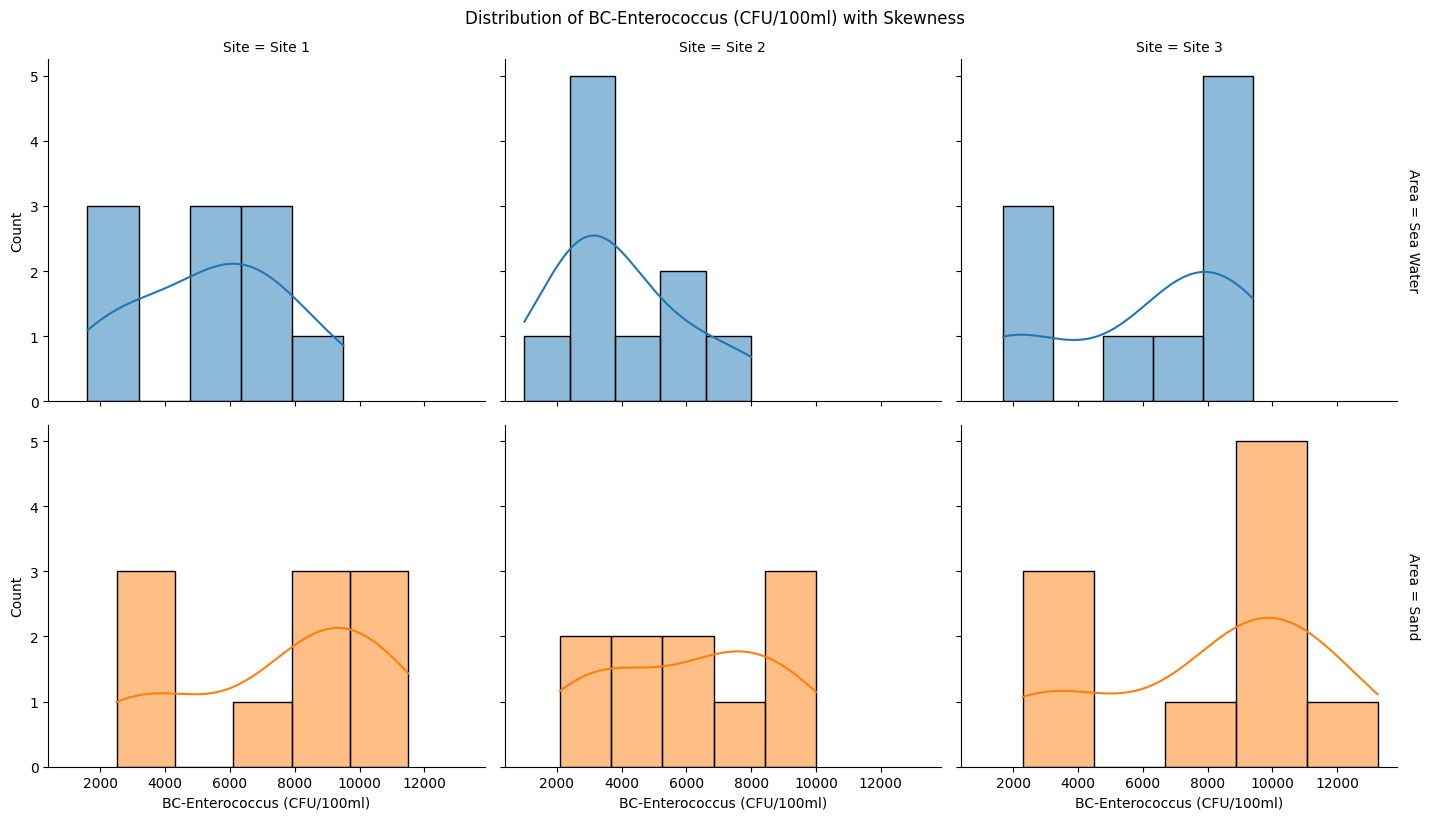

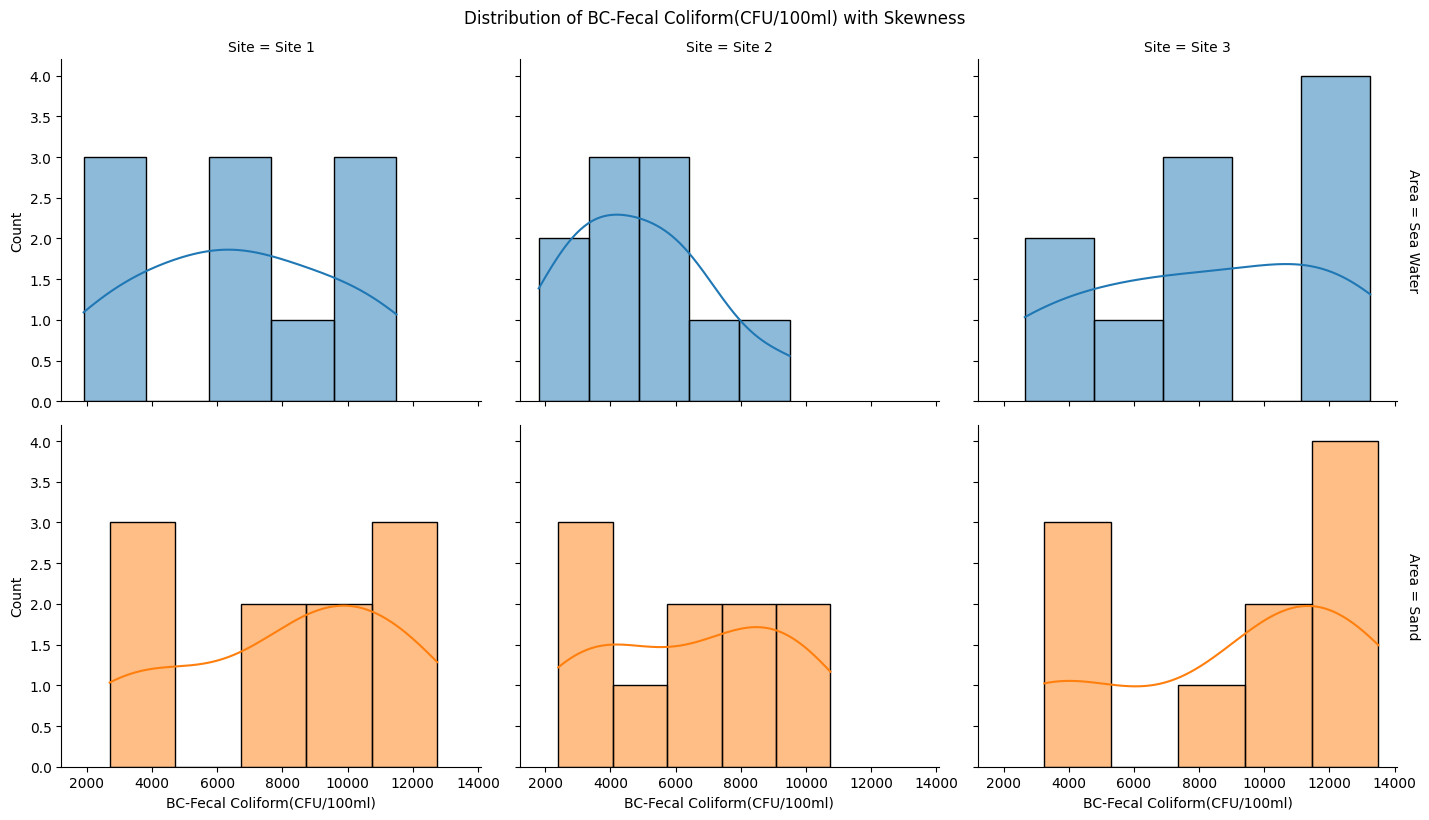

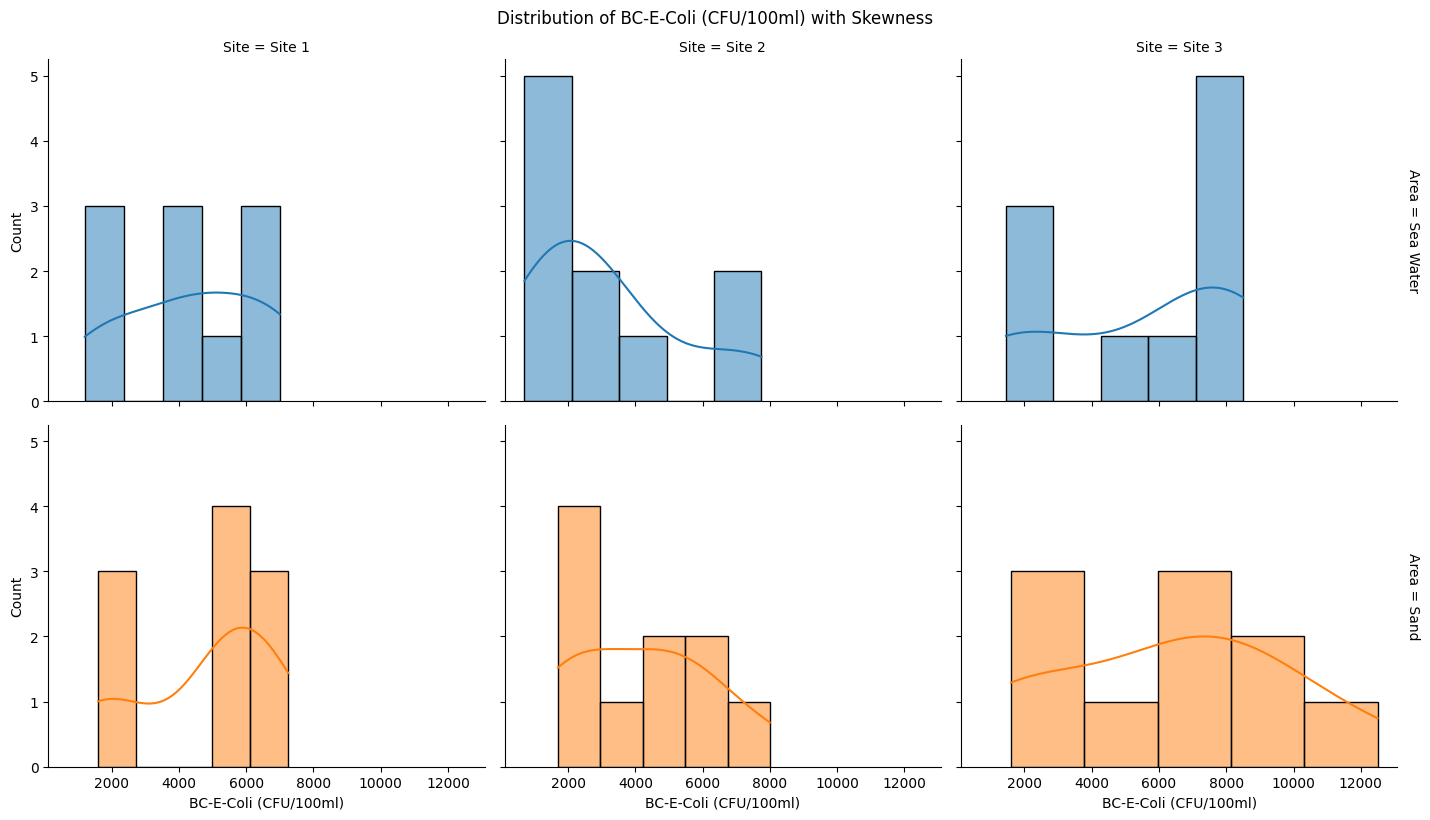

In [ ]:
# histograms for each bacterial type
for bact in bacterial_types:

    g = sns.FacetGrid(df, col='Site', row='Area', hue='Area',
                  margin_titles=True, height=4, aspect=1.2)
    g.map(sns.histplot, bact, kde=True)

    # Adding skewness value as annotation
    for ax in g.axes.flat:
        site = ax.get_title().split('Site = ')[-1].split(',')[0].strip()
        area = ax.get_title().split('Area = ')[-1].split(')')[0].strip()

        if site in df['Site'].unique() and area in df['Area'].unique():
            subset = df[(df['Site'] == site) & (df['Area'] == area)]
            skew_val = skew(subset[bact])
            ax.annotate(f'Skew: {skew_val:.2f}',
                        xy=(0.7, 0.9),
                        xycoords='axes fraction',
                        bbox=dict(boxstyle='round', fc='white', alpha=0.8))

    g.fig.suptitle(f'Distribution of {bact} with Skewness', y=1.02)
    plt.show()